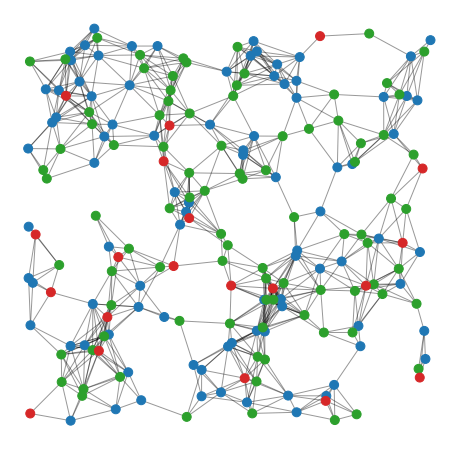

In [92]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
num_nodes = 200

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# G = nx.random_geometric_graph(num_nodes, 0.1, seed=8980)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")
# pos = nx.circular_layout(G)
# pos = nx.bidirectional_dijkstra(G)

# find node near center (0.5,0.5)
# dmin = 1
# ncenter = 0
# for n in pos:
#     x, y = pos[n]
#     d = (x - 0.5) ** 2 + (y - 0.5) ** 2
#     if d < dmin:
#         ncenter = n
#         dmin = d

# color by path length from node near center
# p = dict(nx.single_source_shortest_path_length(G, ncenter))
def selector(x):
    if x < num_nodes*0.45:
        return 'tab:blue'
    elif x < num_nodes*0.9:
        return 'tab:green'
    else:
        return 'tab:red'
p = {i: selector(i) for i in range(num_nodes)}

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

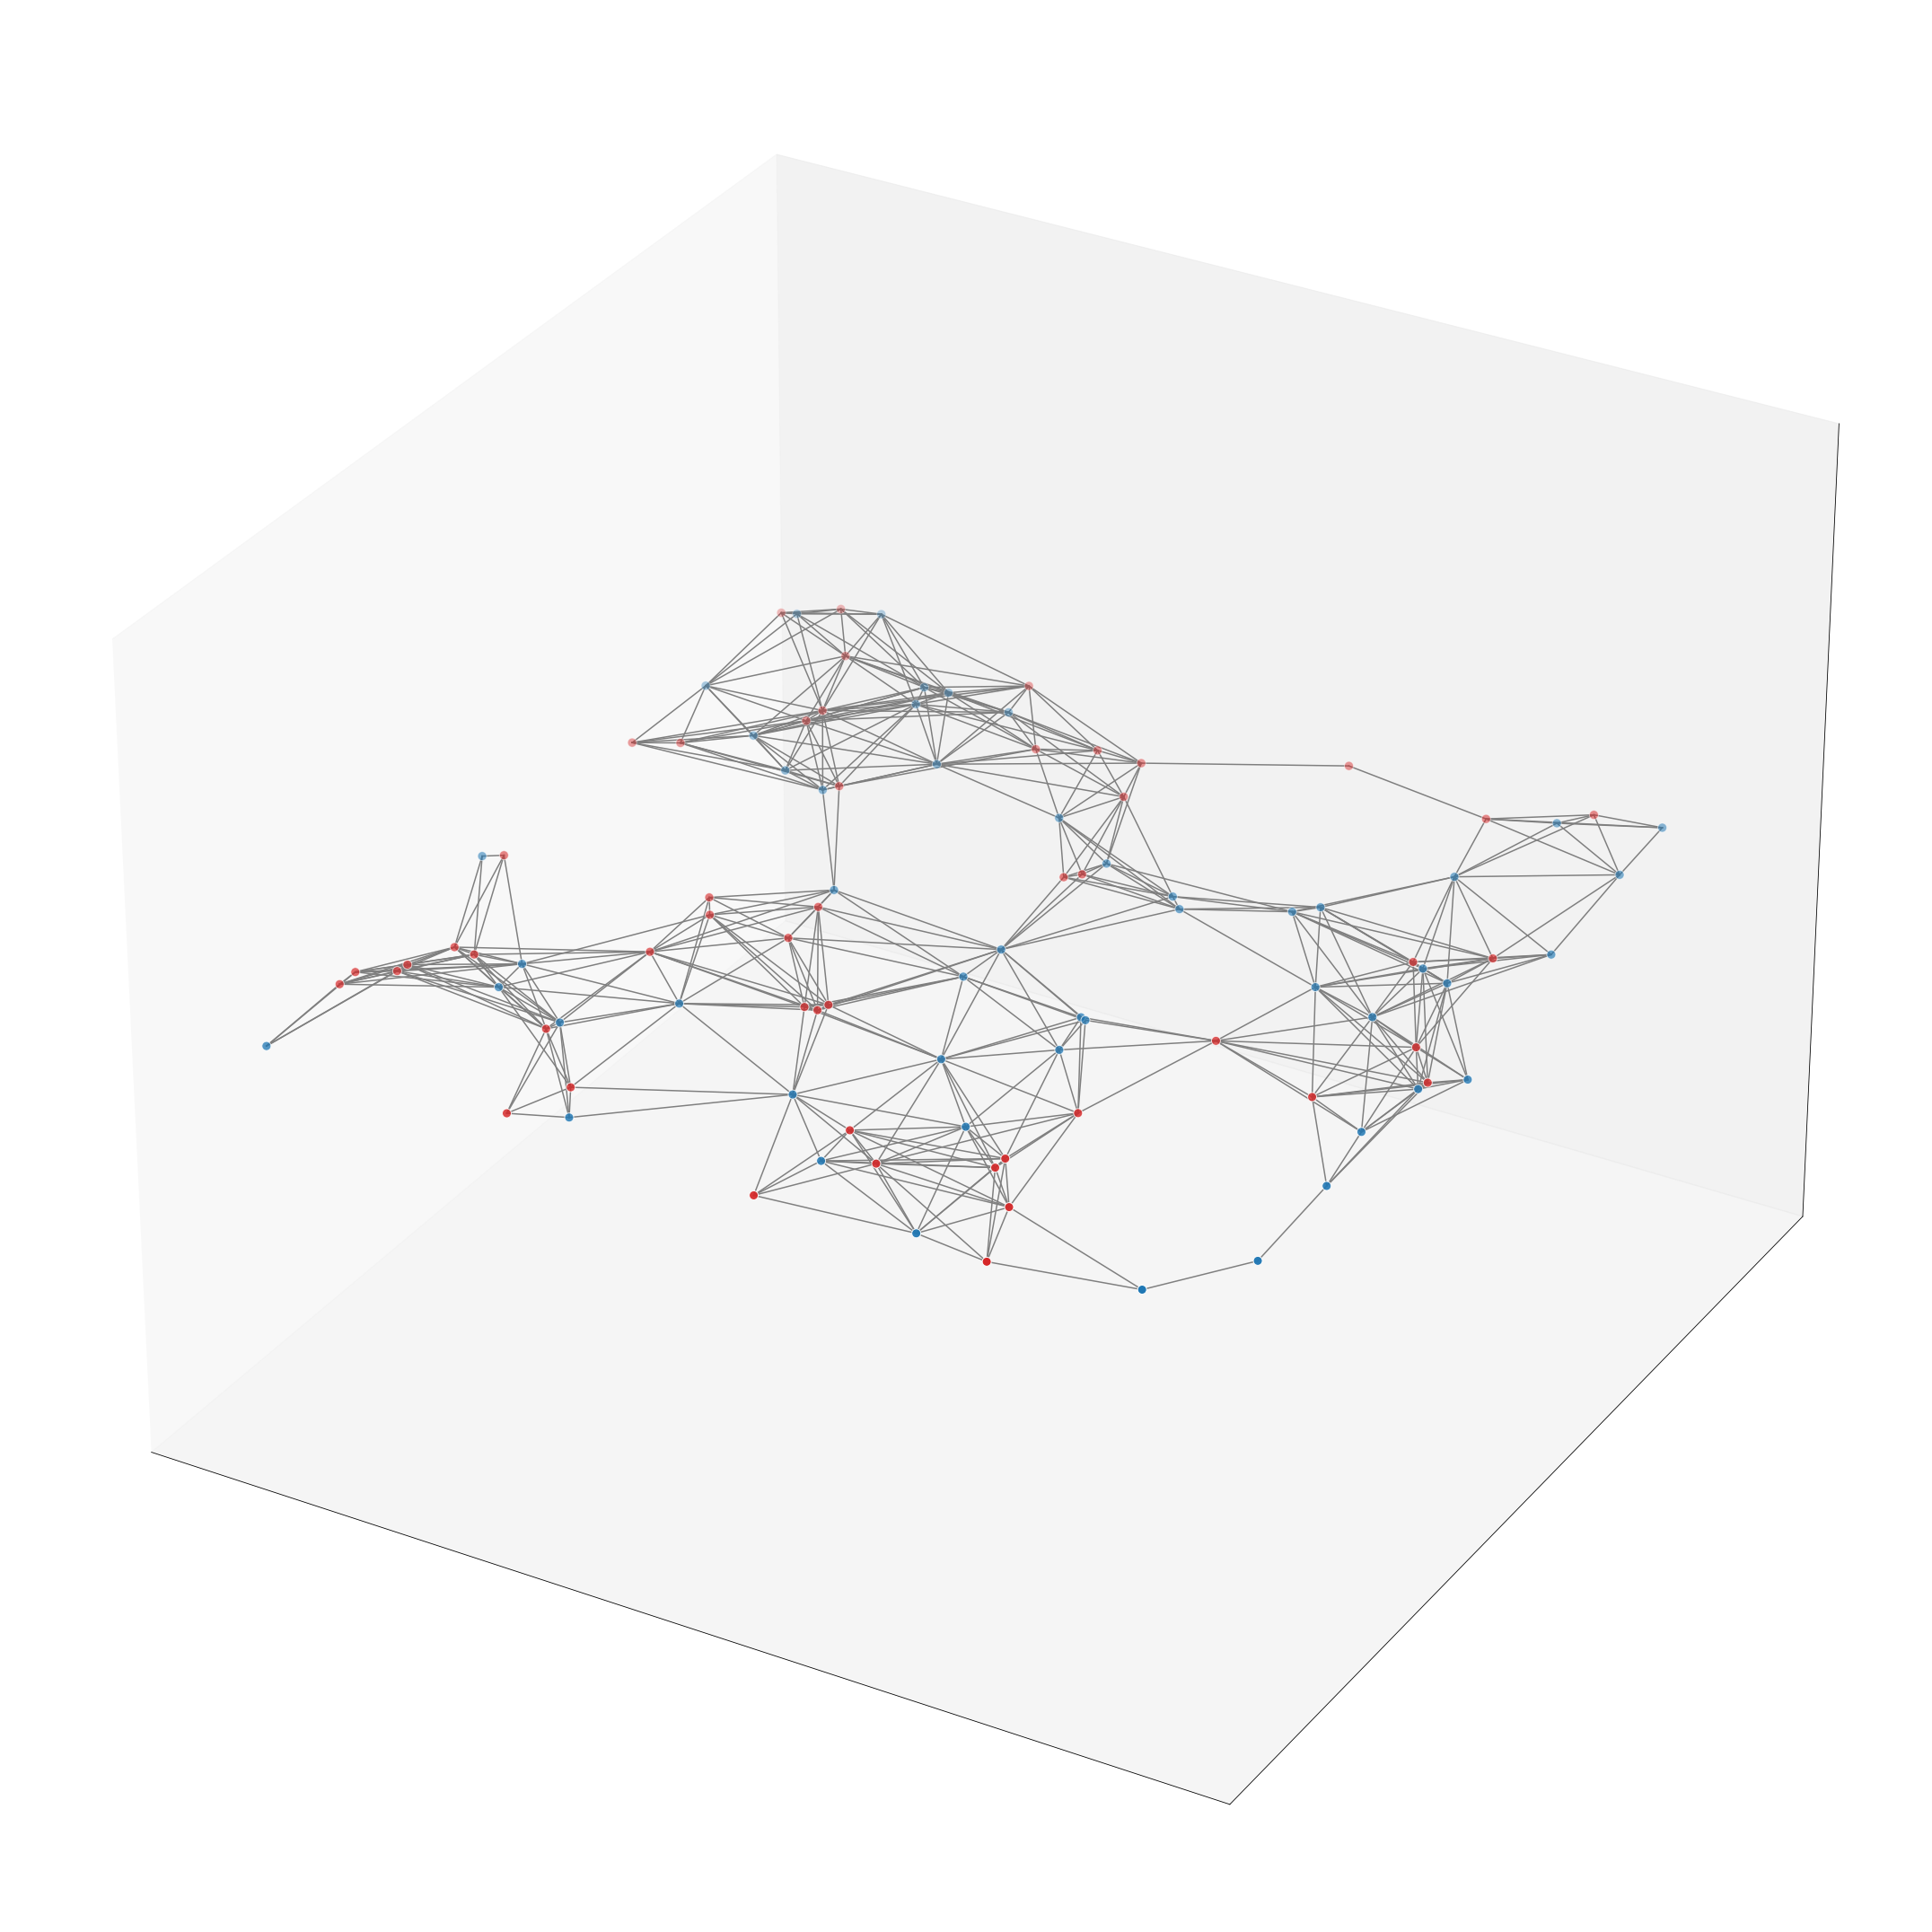

In [70]:
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz[:num_nodes//2].T, s=100, ec="w", color='tab:red')
ax.scatter(*node_xyz[num_nodes//2:].T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")

ax.grid(False)


# def _format_axes(ax):
#     """Visualization options for the 3D axes."""
#     # Turn gridlines off
#     ax.grid(False)
#     # Suppress tick labels
#     for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
#         dim.set_ticks([])
#     # Set axes labels
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel("z")


# _format_axes(ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_facecolor('white')
fig.tight_layout()
plt.show()

In [72]:
import igraph as ig

AttributeError: module 'igraph' has no attribute 'layout_on_sphere'

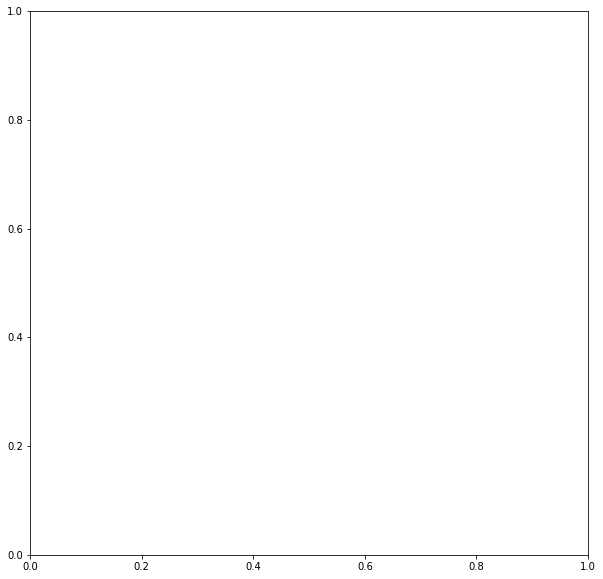

In [86]:
h = ig.Graph.from_networkx(G)


# Plot the same network with NetworkX and igraph
# fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# # NetworkX draw
# ax0.set_title("Plot with NetworkX draw")
# nx.draw_kamada_kawai(G, node_size=50, ax=ax0)

# igraph draw

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.set_title("Plot with igraph plot")
layout = ig.layout_on_sphere(h)
# layout = h.layout_kamada_kawai()
ig.plot(h, layout=layout, target=ax)
plt.axis("off")
plt.show()